In [ ]:
# !pip install seaborn

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [35]:
df_cbo_18 = pd.read_csv("/content/datasets/RAIS_CTPS_CAGED_2018.csv", sep=';', encoding="cp1252")
df_cbo_19 = pd.read_csv("/content/datasets/RAIS_CTPS_CAGED_2019.csv", sep=';', encoding="cp1252")
df_cbo_20 = pd.read_csv("/content/datasets/RAIS_CTPS_CAGED_2020.csv", sep=';', encoding="cp1252")

<ipython-input-35-ed1613ac968a>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cbo_18 = pd.read_csv("/content/datasets/RAIS_CTPS_CAGED_2018.csv", sep=';', encoding="cp1252")
<ipython-input-35-ed1613ac968a>:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cbo_20 = pd.read_csv("/content/datasets/RAIS_CTPS_CAGED_2020.csv", sep=';', encoding="cp1252")


In [41]:
df_cbo = pd.concat([df_cbo_18,df_cbo_19,df_cbo_20], axis=0, ignore_index=True)
df_cbo.shape

(568802, 28)

In [42]:
df_cbo['cbo_2002'] = df_cbo['cbo_2002'].astype(str)
df_cbo['cbo2002ocupacao'] = df_cbo['cbo2002ocupacao'].astype(str)

df_cbo.replace('nan', np.nan, inplace=True)
df_cbo['cbo_2002_norm'] = df_cbo['cbo_2002'].combine_first(df_cbo['cbo2002ocupacao'])

df_cbo['cbo_2002_norm'] = df_cbo['cbo_2002_norm'].astype(str)
df_cbo['cbo_2002_norm']

0           241325
1           123115
2           411010
3           914415
4           911205
            ...   
568797    414105.0
568798    514225.0
568799    514320.0
568800    621005.0
568801    421115.0
Name: cbo_2002_norm, Length: 568802, dtype: object

In [43]:
cbos = [
    '2626', #Músicos regentes e arranjadores
    '2627' #Músicos interpretes
]

df_cbo = df_cbo[df_cbo['cbo_2002_norm'].str.contains('2627')].reset_index()

df_cbo

,index,competencia,movimento,pais,continente,tipo_mov_desagregado,uf,municipio,cbo_2002,cnae_20_classe,...,competenciamov,saldomovimentacao,cbo2002ocupacao,subclasse,secao,categoria,salario,racacor,tipomovimentacao,cbo_2002_norm
0,5865,201801.0,1.0,PARAGUAI,AMÉRICA DO SUL,2.0,41,410830,262710,56112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262710
1,25669,201803.0,1.0,CUBA,AMÉRICA CENTRAL E CARIBE,1.0,13,130260,262710,90035.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262710
2,26304,201803.0,2.0,COLÔMBIA,AMÉRICA DO SUL,6.0,31,310620,262710,94936.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262710
3,26671,201803.0,2.0,NÃO ESPECIFICADO,EUROPA,8.0,33,330455,262710,90019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262710
4,26735,201803.0,2.0,FRANÇA,EUROPA,8.0,33,330455,262710,90019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,504398,NaN,NaN,ESTADOS UNIDOS,AMÉRICA DO NORTE,NaN,15,999999,NaN,NaN,...,202009.0,-1.0,262710.0,9493600.0,S,101.0,1780.55,3.0,40.0,262710.0
61,526013,NaN,NaN,FRANÇA,EUROPA,NaN,13,999999,NaN,NaN,...,202010.0,-1.0,262705.0,9003500.0,R,101.0,6180.43,1.0,31.0,262705.0
62,532490,NaN,NaN,VENEZUELA,AMÉRICA DO SUL,NaN,35,354980,NaN,NaN,...,202011.0,1.0,262710.0,8592903.0,P,101.0,3823.12,1.0,20.0,262710.0
63,557124,NaN,NaN,PARAGUAI,AMÉRICA DO SUL,NaN,41,410830,NaN,NaN,...,202012.0,-1.0,262710.0,5611201.0,I,101.0,1437.00,1.0,40.0,262710.0


In [44]:
mapeamento_uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal',
    99: 'Não identificado'
}

df_cbo['uf'] = df_cbo['uf'].map(mapeamento_uf)

df_cbo

,index,competencia,movimento,pais,continente,tipo_mov_desagregado,uf,municipio,cbo_2002,cnae_20_classe,...,competenciamov,saldomovimentacao,cbo2002ocupacao,subclasse,secao,categoria,salario,racacor,tipomovimentacao,cbo_2002_norm
0,5865,201801.0,1.0,PARAGUAI,AMÉRICA DO SUL,2.0,Paraná,410830,262710,56112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262710
1,25669,201803.0,1.0,CUBA,AMÉRICA CENTRAL E CARIBE,1.0,Amazonas,130260,262710,90035.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262710
2,26304,201803.0,2.0,COLÔMBIA,AMÉRICA DO SUL,6.0,Minas Gerais,310620,262710,94936.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262710
3,26671,201803.0,2.0,NÃO ESPECIFICADO,EUROPA,8.0,Rio de Janeiro,330455,262710,90019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262710
4,26735,201803.0,2.0,FRANÇA,EUROPA,8.0,Rio de Janeiro,330455,262710,90019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,504398,NaN,NaN,ESTADOS UNIDOS,AMÉRICA DO NORTE,NaN,Pará,999999,NaN,NaN,...,202009.0,-1.0,262710.0,9493600.0,S,101.0,1780.55,3.0,40.0,262710.0
61,526013,NaN,NaN,FRANÇA,EUROPA,NaN,Amazonas,999999,NaN,NaN,...,202010.0,-1.0,262705.0,9003500.0,R,101.0,6180.43,1.0,31.0,262705.0
62,532490,NaN,NaN,VENEZUELA,AMÉRICA DO SUL,NaN,São Paulo,354980,NaN,NaN,...,202011.0,1.0,262710.0,8592903.0,P,101.0,3823.12,1.0,20.0,262710.0
63,557124,NaN,NaN,PARAGUAI,AMÉRICA DO SUL,NaN,Paraná,410830,NaN,NaN,...,202012.0,-1.0,262710.0,5611201.0,I,101.0,1437.00,1.0,40.0,262710.0


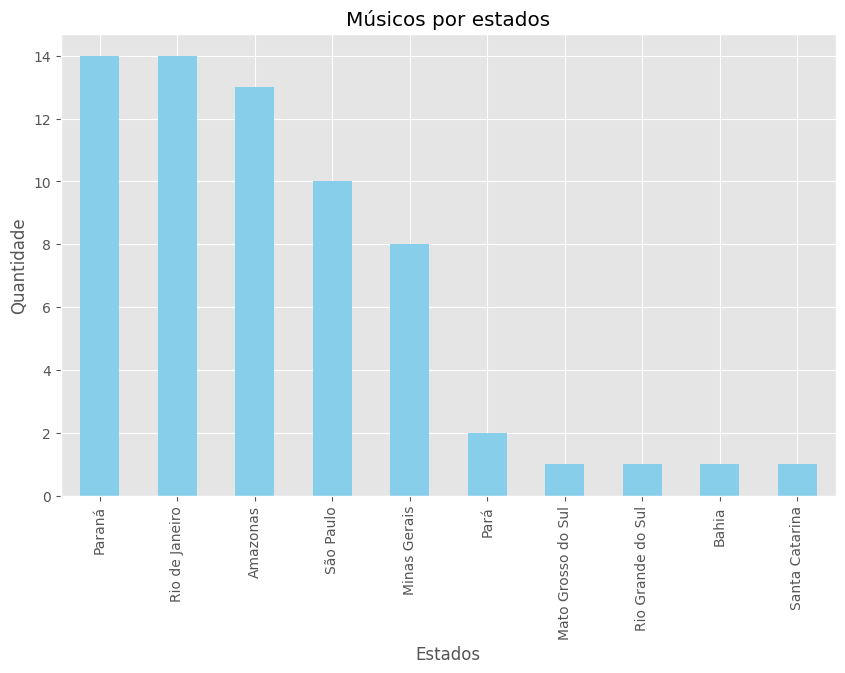

In [45]:
qtd_ufs = df_cbo['uf'].value_counts()

plt.figure(figsize=(10, 6))
qtd_ufs.plot(kind='bar', color='skyblue')
plt.title('Músicos por estados')
plt.xlabel('Estados')
plt.ylabel('Quantidade')
plt.show()

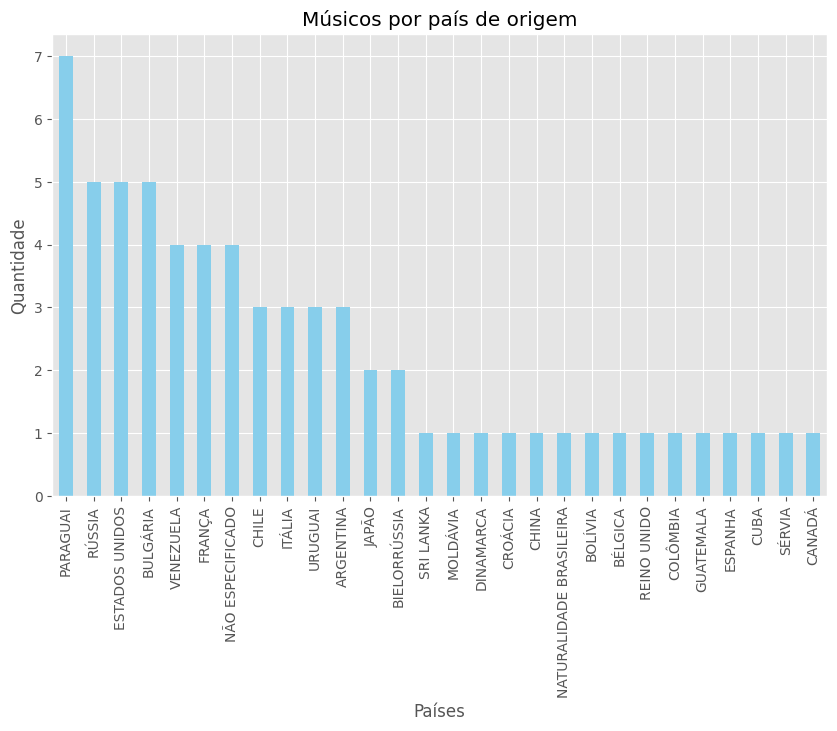

In [46]:
qtd_paises = df_cbo['pais'].value_counts()

plt.figure(figsize=(10, 6))
qtd_paises.plot(kind='bar', color='skyblue')
plt.title('Músicos por país de origem')
plt.xlabel('Países')
plt.ylabel('Quantidade')
plt.show()